## Dependencies and Datasets Importing

In [3]:
# Dependencies
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
plt.style.use('seaborn')

In [4]:
# Store filepath in a variable
madden_ratings_csv = "Resources/Madden_Player_Ratings_2015-2019.csv"
team_standings_2015_2018_csv = "Resources/Team_Standings_2015-2018.csv"
player_stats_2015_2018_csv = "Resources/Player_Stats_2015-2018.csv"

In [5]:
# Read our Data file with the pandas library
madden_ratings_df = pd.read_csv(madden_ratings_csv, encoding="UTF-8")
team_standings_2015_2018_df = pd.read_csv(team_standings_2015_2018_csv, encoding="UTF-8")
player_stats_2015_2018_df = pd.read_csv(player_stats_2015_2018_csv, encoding="UTF-8")

## Data Cleansing

In [6]:
#  Create a new df for each years data for each dataframe 
madden_ratings_2015_df = madden_ratings_df.loc[madden_ratings_df["Season Year"] == 2015]
madden_ratings_2016_df = madden_ratings_df.loc[madden_ratings_df["Season Year"] == 2016]
madden_ratings_2017_df = madden_ratings_df.loc[madden_ratings_df["Season Year"] == 2017]
madden_ratings_2018_df = madden_ratings_df.loc[madden_ratings_df["Season Year"] == 2018]
madden_ratings_2019_df = madden_ratings_df.loc[madden_ratings_df["Season Year"] == 2019]

team_standings_2015_df = team_standings_2015_2018_df.loc[team_standings_2015_2018_df["Year"] == 2015]
team_standings_2016_df = team_standings_2015_2018_df.loc[team_standings_2015_2018_df["Year"] == 2016]
team_standings_2017_df = team_standings_2015_2018_df.loc[team_standings_2015_2018_df["Year"] == 2017]
team_standings_2018_df = team_standings_2015_2018_df.loc[team_standings_2015_2018_df["Year"] == 2018]

player_stats_2015_df = player_stats_2015_2018_df.loc[player_stats_2015_2018_df["Year"] == 2015]
player_stats_2016_df = player_stats_2015_2018_df.loc[player_stats_2015_2018_df["Year"] == 2016]
player_stats_2017_df = player_stats_2015_2018_df.loc[player_stats_2015_2018_df["Year"] == 2017]
player_stats_2018_df = player_stats_2015_2018_df.loc[player_stats_2015_2018_df["Year"] == 2018]

In [7]:
# Rename the column: Full name to Player
madden_ratings_2015_df = madden_ratings_2015_df.rename(columns={"Full Name" : "Player"})
madden_ratings_2016_df = madden_ratings_2016_df.rename(columns={"Full Name" : "Player"})
madden_ratings_2017_df = madden_ratings_2017_df.rename(columns={"Full Name" : "Player"})
madden_ratings_2018_df = madden_ratings_2018_df.rename(columns={"Full Name" : "Player"})
madden_ratings_2019_df = madden_ratings_2019_df.rename(columns={"Full Name" : "Player"})

# Drop columns: First Name, Last Name, Season Year
madden_ratings_2015_df = madden_ratings_2015_df.drop(["First Name", "Last Name", "Season Year", "Position"], axis=1)
madden_ratings_2016_df = madden_ratings_2016_df.drop(["First Name", "Last Name", "Season Year", "Position"], axis=1)
madden_ratings_2017_df = madden_ratings_2017_df.drop(["First Name", "Last Name", "Season Year", "Position"], axis=1)
madden_ratings_2018_df = madden_ratings_2018_df.drop(["First Name", "Last Name", "Season Year", "Position"], axis=1)
madden_ratings_2019_df = madden_ratings_2019_df.drop(["First Name", "Last Name", "Season Year", "Position"], axis=1)


In [8]:
# Replace the column: FDPt\n to FDPt
player_stats_2015_df = player_stats_2015_df.replace("\n", "")
player_stats_2016_df = player_stats_2016_df.replace("\n", "")
player_stats_2017_df = player_stats_2017_df.replace("\n", "")
player_stats_2018_df = player_stats_2018_df.replace("\n", "")

# Drop columns: Tm, Age, Games, Games Started, 2Pt Made, 2Pt Pass, DKPt, FDPt, VBD
player_stats_2015_df = player_stats_2015_df.drop(["Tm", "Age", "Games", "Games Started", "2Pt Made", "2Pt Pass", "DKPt", "FDPt", "VBD"], axis=1)
player_stats_2016_df = player_stats_2016_df.drop(["Tm", "Age", "Games", "Games Started", "2Pt Made", "2Pt Pass", "DKPt", "FDPt", "VBD"], axis=1)
player_stats_2017_df = player_stats_2017_df.drop(["Tm", "Age", "Games", "Games Started", "2Pt Made", "2Pt Pass", "DKPt", "FDPt", "VBD"], axis=1)
player_stats_2018_df = player_stats_2018_df.drop(["Tm", "Age", "Games", "Games Started", "2Pt Made", "2Pt Pass", "DKPt", "FDPt", "VBD"], axis=1)


In [9]:
# Merge dataframes: Madden ratings & Player stats
final_2015_df = pd.merge(player_stats_2015_df, madden_ratings_2015_df, on="Player", how="outer")
final_2016_df = pd.merge(player_stats_2016_df, madden_ratings_2016_df, on="Player", how="outer")
final_2017_df = pd.merge(player_stats_2017_df, madden_ratings_2017_df, on="Player", how="outer")
final_2018_df = pd.merge(player_stats_2018_df, madden_ratings_2018_df, on="Player", how="outer")

In [10]:
# Replace team names: SD to LAC & NYJ to NJY
final_2015_df = final_2015_df.replace("SD", "LAC")
final_2016_df = final_2016_df.replace("SD", "LAC")
final_2017_df = final_2017_df.replace("SD", "LAC")
final_2018_df = final_2018_df.replace("SD", "LAC")

final_2015_df = final_2015_df.replace("NYJ", "NJY")
final_2016_df = final_2016_df.replace("NYJ", "NJY")
final_2017_df = final_2017_df.replace("NYJ", "NJY")
final_2018_df = final_2018_df.replace("NYJ", "NJY")


## Data Analysis

### Visualization - Team Level

In [11]:
# Calculate the average overall points for all teams in each year
overall_2015 = final_2015_df["Overall"].mean()
overall_2016 = final_2016_df["Overall"].mean()
overall_2017 = final_2017_df["Overall"].mean()
overall_2018 = final_2018_df["Overall"].mean()

overall_summary = round(pd.Series([overall_2015, overall_2016, overall_2017, overall_2018], ["2015", "2016", "2017", "2018"]), 2)

overall_summary


2015    73.55
2016    71.30
2017    71.71
2018    72.31
dtype: float64

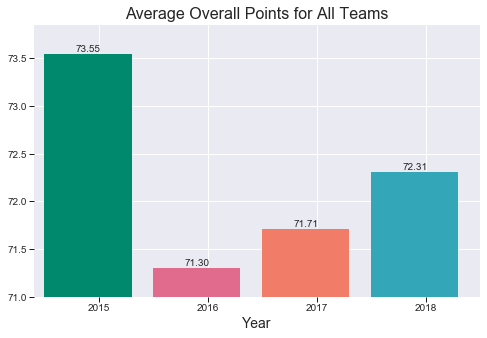

In [12]:
# Create the barchart
x_axis = np.arange(0, 4, 1)
color_2015 = "#00896C"
color_2016 = "#E16B8C"
color_2017 = "#F17C67"
color_2018 = "#33A6B8"
bar_width = 0.8

# Set the condition
year2015 = overall_summary == 73.55
year2016 = overall_summary == 71.30
year2017 = overall_summary == 71.71
year2018 = overall_summary == 72.31

# Set elements to create a chart
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlim(-0.1, len(x_axis))
ax.set_ylim(min(overall_summary)-0.3, max(overall_summary)+0.3)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("")
ax.set_title("Average Overall Points for All Teams", fontsize = 16)
ax.set_xticks([x+0.5 for x in x_axis])
ax.set_xticklabels(overall_summary.index)
ax.tick_params(direction="out", length=5, width=1, color="#1C1C1C", axis="both", pad=2)

bar2015 = ax.bar(x_axis[year2015], overall_summary[year2015], color=color_2015, width=bar_width, align="edge")
bar2016 = ax.bar(x_axis[year2016], overall_summary[year2016], color=color_2016, width=bar_width, align="edge")
bar2017 = ax.bar(x_axis[year2017], overall_summary[year2017], color=color_2017, width=bar_width, align="edge")
bar2018 = ax.bar(x_axis[year2018], overall_summary[year2018], color=color_2018, width=bar_width, align="edge")

# Put numbers for each year in each bar
def label(point):
    for x in point:
        bar_height = x.get_height()
        bar_format = "{0:.2f}".format(bar_height)
        ax.text(x.get_x() + x.get_width()/2, 1*bar_height, bar_format, ha="center", va="bottom")
        
label(bar2015)
label(bar2016)
label(bar2017)
label(bar2018)

fig.savefig("Figure1 - Average Overall Points")

In [13]:
# Create subgroups for the average overall points of each team in each year
team_overall_2015 = final_2015_df.groupby(["Team"])["Overall"].mean()
team_overall_2016 = final_2016_df.groupby(["Team"])["Overall"].mean()
team_overall_2017 = final_2017_df.groupby(["Team"])["Overall"].mean()
team_overall_2018 = final_2018_df.groupby(["Team"])["Overall"].mean()

# Put the average overall points into a dataframe & Round the results to 2 decimal place
team_overall_summary = round(pd.DataFrame({"2015" : team_overall_2015,
                        "2016" : team_overall_2016,
                        "2017" : team_overall_2017,
                        "2018" : team_overall_2018}), 2)

# Calculate the overall average for each team over 4 years
team_overall_summary["Total"] = round(team_overall_summary.agg(["mean"], axis="columns"), 2)

team_overall_summary.head()

,2015,2016,2017,2018,Total
Team,,,,,
ARI,73.35,71.45,70.97,69.99,71.44
ATL,73.58,70.99,72.21,72.19,72.24
BAL,74.10,72.66,71.36,72.77,72.72
BUF,73.22,72.35,71.83,71.92,72.33
CAR,73.77,72.03,72.03,72.00,72.46


In [14]:
# Replace the team name: PHL to PHI & NYJ to NJY
team_standings_2015_df = team_standings_2015_df.replace("PHL", "PHI")
team_standings_2016_df = team_standings_2016_df.replace("PHL", "PHI")
team_standings_2017_df = team_standings_2017_df.replace("PHL", "PHI")
team_standings_2018_df = team_standings_2018_df.replace("PHL", "PHI")

team_standings_2015_df = team_standings_2015_df.replace("NYJ", "NJY")
team_standings_2016_df = team_standings_2016_df.replace("NYJ", "NJY")
team_standings_2017_df = team_standings_2017_df.replace("NYJ", "NJY")
team_standings_2018_df = team_standings_2018_df.replace("NYJ", "NJY")

# Replace nan in Playoff Rank with zero
team_standings_2015_df["Playoff Rank"] = team_standings_2015_df["Playoff Rank"].fillna(0)
team_standings_2016_df["Playoff Rank"] = team_standings_2016_df["Playoff Rank"].fillna(0)
team_standings_2017_df["Playoff Rank"] = team_standings_2017_df["Playoff Rank"].fillna(0)
team_standings_2018_df["Playoff Rank"] = team_standings_2018_df["Playoff Rank"].fillna(0)

# Convert float to integer
team_standings_2015_df["Playoff Rank"] = team_standings_2015_df["Playoff Rank"].astype(int)
team_standings_2016_df["Playoff Rank"] = team_standings_2016_df["Playoff Rank"].astype(int)
team_standings_2017_df["Playoff Rank"] = team_standings_2017_df["Playoff Rank"].astype(int)
team_standings_2018_df["Playoff Rank"] = team_standings_2018_df["Playoff Rank"].astype(int)


### Madden Ratings vs Wins & PFs & PAs

In [15]:
# Calculate the average wins for each team in each year
win_2015 = team_standings_2015_df.groupby(["Team"])["W"].mean()
win_2016 = team_standings_2016_df.groupby(["Team"])["W"].mean()
win_2017 = team_standings_2017_df.groupby(["Team"])["W"].mean()
win_2018 = team_standings_2018_df.groupby(["Team"])["W"].mean()

# Put results into a dataframe
win_summary = pd.DataFrame({"2015" : win_2015,
                        "2016" : win_2016,
                        "2017" : win_2017,
                        "2018" : win_2018})

# Calculate the total average of wins for each team over 4 years
win_summary["Total"] = win_summary.agg(["mean"], axis="columns")
win_summary.head()

,2015,2016,2017,2018,Total
Team,,,,,
ARI,13,7,8,3,7.75
ATL,8,11,10,7,9.00
BAL,5,8,9,10,8.00
BUF,8,7,9,6,7.50
CAR,15,6,11,7,9.75


In [16]:
# Calculate the average points-for for each team in each year
points_for_2015 = team_standings_2015_df.groupby(["Team"])["PF"].mean()
points_for_2016 = team_standings_2016_df.groupby(["Team"])["PF"].mean()
points_for_2017 = team_standings_2017_df.groupby(["Team"])["PF"].mean()
points_for_2018 = team_standings_2018_df.groupby(["Team"])["PF"].mean()

# Put results into a dataframe
points_for_summary = pd.DataFrame({"2015" : points_for_2015,
                        "2016" : points_for_2016,
                        "2017" : points_for_2017,
                        "2018" : points_for_2018})

# Calculate the total average of points-for for each team over 4 years
points_for_summary["Total"] = points_for_summary.agg(["mean"], axis="columns")
points_for_summary.head()

,2015,2016,2017,2018,Total
Team,,,,,
ARI,489,418,295,225,356.75
ATL,339,540,353,414,411.50
BAL,328,343,395,389,363.75
BUF,379,399,302,269,337.25
CAR,500,369,363,376,402.00


In [17]:
# Calculate the average points-against for each team in each year
points_against_2015 = team_standings_2015_df.groupby(["Team"])["PA"].mean()
points_against_2016 = team_standings_2016_df.groupby(["Team"])["PA"].mean()
points_against_2017 = team_standings_2017_df.groupby(["Team"])["PA"].mean()
points_against_2018 = team_standings_2018_df.groupby(["Team"])["PA"].mean()

# Put results into a dataframe
points_against_summary = pd.DataFrame({"2015" : points_against_2015,
                        "2016" : points_against_2016,
                        "2017" : points_against_2017,
                        "2018" : points_against_2018})

# Calculate the total average of points-for for each team over 4 years
points_against_summary["Total"] = points_against_summary.agg(["mean"], axis="columns")
points_against_summary.head()

,2015,2016,2017,2018,Total
Team,,,,,
ARI,313,362,361,425,365.25
ATL,345,406,315,423,372.25
BAL,401,321,303,287,328.00
BUF,359,378,359,374,367.50
CAR,308,402,327,382,354.75


In [18]:
# Reset the index
table1 = team_overall_summary.reset_index()
table2 = win_summary.reset_index().rename(columns={"index" : "Team"})
table3 = points_for_summary.reset_index()
table4 = points_against_summary.reset_index()

# Merge dataframes
overall_win = pd.merge(table1, table2, on="Team", how="outer", suffixes=("_All", "_Win"))
overall_pointsFor = pd.merge(table1, table3, on="Team", how="outer", suffixes=("_All", "_PF"))
overall_pointsAgainst = pd.merge(table1, table4, on="Team", how="outer", suffixes=("_All", "_PA"))

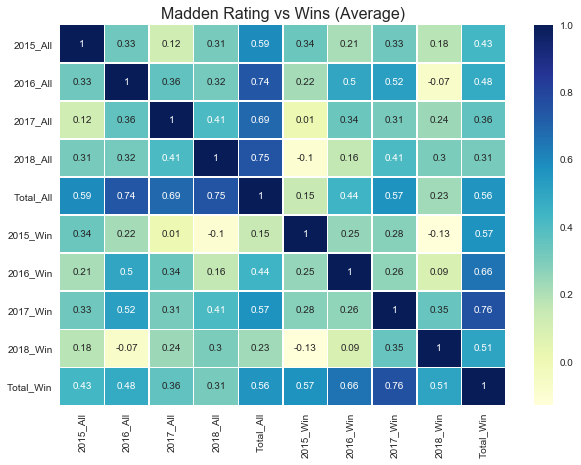

In [19]:
# Calculate the correlation among variables
overall_win_corr = round(overall_win.corr(), 2)

# Plot the correlation heatmap
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(overall_win_corr, cmap="YlGnBu", linewidths=.4, annot=True)
ax.set_title("Madden Rating vs Wins (Average)", fontsize = 16)

fig.savefig("Figure2 - Madden Rating vs Wins")

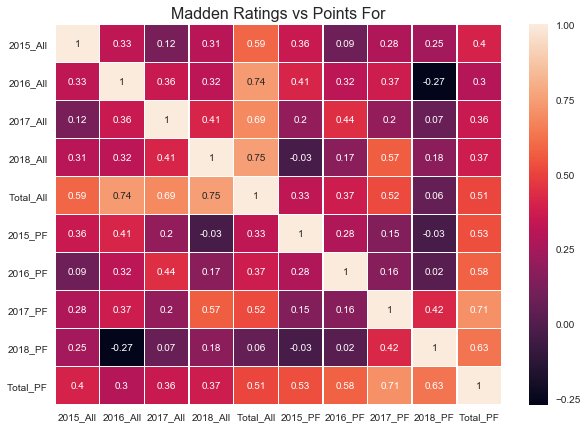

In [20]:
# Calculate the correlation among variables
overall_pointsFor_corr = round(overall_pointsFor.corr(), 2)

# Plot the correlation heatmap
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(overall_pointsFor_corr, linewidths=.4, annot=True)
ax.set_title("Madden Ratings vs Points For", fontsize = 16)

fig.savefig("Figure3 - Madden Rating vs Points For")

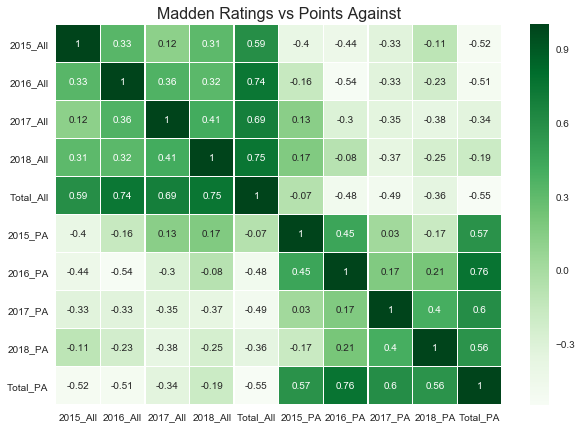

In [21]:
# Calculate the correlation among variables
overall_pointsAgainst_corr = round(overall_pointsAgainst.corr(), 2)

# Plot the correlation heatmap
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(overall_pointsAgainst_corr, cmap="Greens", linewidths=.4, annot=True)
ax.set_title("Madden Ratings vs Points Against", fontsize = 16)

fig.savefig("Figure4 - Madden Rating vs Points Against")

### Regression Analysis

In [22]:
import statsmodels.api as sm
from sklearn import linear_model

In [23]:
regression_2015 = pd.DataFrame({"Overall" : round(team_overall_2015, 2),
                                "Wins" : win_2015,
                                "Points For": points_for_2015,
                                "Points Against" : points_against_2015})

regression_2016 = pd.DataFrame({"Overall" : round(team_overall_2016, 2),
                                "Wins" : win_2016,
                                "Points For": points_for_2016,
                                "Points Against" : points_against_2016})

regression_2017 = pd.DataFrame({"Overall" : round(team_overall_2017, 2),
                                "Wins" : win_2017,
                                "Points For": points_for_2017,
                                "Points Against" : points_against_2017})

regression_2018 = pd.DataFrame({"Overall" : round(team_overall_2018, 2),
                                "Wins" : win_2018,
                                "Points For": points_for_2018,
                                "Points Against" : points_against_2018})


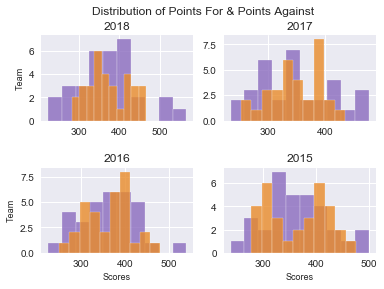

In [61]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle("Distribution of Points For & Points Against")
regression_2018["Points For"].plot(kind="hist",color="#8A6BBE",edgecolor='white', alpha=0.8, figsize=(6,4), ax=ax1)
regression_2018["Points Against"].plot(kind='hist',color="#E98B2A",edgecolor='white', alpha=0.8, figsize=(6,4), ax=ax1)
ax1.set_ylabel("Team", fontsize=9)
ax1.set_title("2018")


regression_2017["Points For"].plot(kind="hist",color="#8A6BBE",edgecolor='white', alpha=0.8, figsize=(6,4), ax=ax2)
regression_2017["Points Against"].plot(kind='hist',color="#E98B2A",edgecolor='white', alpha=0.8, figsize=(6,4), ax=ax2)
ax2.set_ylabel("", fontsize=9)
ax2.set_title("2017")


regression_2016["Points For"].plot(kind="hist",color="#8A6BBE",edgecolor='white', alpha=0.8, figsize=(6,4), ax=ax3)
regression_2016["Points Against"].plot(kind='hist',color="#E98B2A",edgecolor='white', alpha=0.8, figsize=(6,4), ax=ax3)
ax3.set_xlabel("Scores", fontsize=9)
ax3.set_ylabel("Team", fontsize=9)
ax3.set_title("2016")


regression_2015["Points For"].plot(kind="hist",color="#8A6BBE",edgecolor='white', alpha=0.8, figsize=(6,4), ax=ax4)
regression_2015["Points Against"].plot(kind='hist',color="#E98B2A",edgecolor='white', alpha=0.8, figsize=(6,4), ax=ax4)
ax4.set_xlabel("Scores", fontsize=9)
ax4.set_ylabel("", fontsize=9)
ax4.set_title("2015")

fig.subplots_adjust(hspace=0.55)

fig.savefig("Figure5 - Distribution of PFs & PAs")

In [62]:
y_2018 = regression_2018["Overall"]
X_2018 = regression_2018[["Wins", "Points For", "Points Against"]]
X_2018 = sm.add_constant(X_2018)

model_2018 = sm.OLS(y_2018, X_2018).fit()
predictions_2018 = model_2018.predict(X_2018)
model_2018.summary()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.024
Date:                Wed, 02 Oct 2019   Prob (F-statistic):              0.397
Time:                        16:05:41   Log-Likelihood:                -40.609
No. Observations:                  32   AIC:                             89.22
Df Residuals:                      28   BIC:                             95.08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             72.3417      2.098     34.480      0.000      68.044      76.639
Wins               0.0892      0.164      0.544      0.591      -0.247       0.425
Points For        -0.0005      0.005     -0.095      0.925      -0.011       0.010
Points Against    -0.0015      0.006     -0.259      0.798      -0.013       0.010
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                7.822
Skew:                           0.918   Prob(JB):                       0.0200
Kurtosis:                       4.579   Cond. No.                     6.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

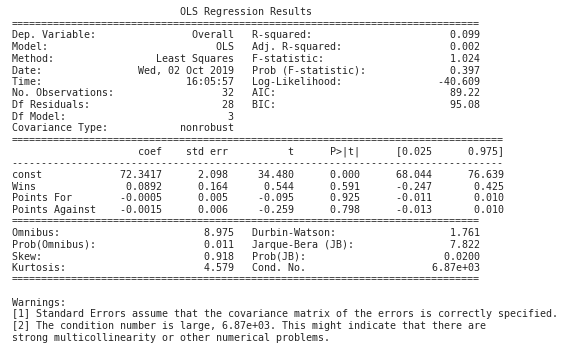

In [64]:
plt.rc('figure', figsize=(8, 5))
plt.text(0.01, 0.05, str(model_2018.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('Table1 - Regression 2018.png')

In [65]:
y_2015 = regression_2015["Overall"]
X_2015 = regression_2015[["Wins", "Points For", "Points Against"]]
X_2015 = sm.add_constant(X_2015)

model_2015 = sm.OLS(y_2015, X_2015).fit()
predictions_2015 = model_2015.predict(X_2015)
model_2015.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     3.491
Date:                Wed, 02 Oct 2019   Prob (F-statistic):             0.0286
Time:                        16:06:32   Log-Likelihood:                -28.303
No. Observations:                  32   AIC:                             64.61
Df Residuals:                      28   BIC:                             70.47
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             75.4976      1.614     46.777      0.000      72.191      78.804
Wins              -0.1680      0.107     -1.568      0.128      -0.387       0.051
Points For         0.0074      0.004      2.067      0.048    6.65e-05       0.015
Points Against    -0.0091      0.004     -2.273      0.031      -0.017      -0.001
==============================================================================
Omnibus:                        0.352   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.838   Jarque-Bera (JB):                0.459
Skew:                           0.217   Prob(JB):                        0.795
Kurtosis:                       2.604   Cond. No.                     7.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

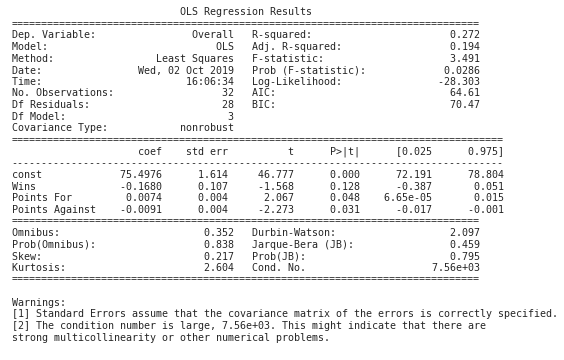

In [66]:
plt.rc('figure', figsize=(8, 5))
plt.text(0.01, 0.05, str(model_2015.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('Table2 - Regression 2015.png')